In [2]:
import pandas as pd
import seaborn as sns 

from matplotlib import pyplot as plt 
%matplotlib inline
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})

from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm

import warnings 
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("SpotifyFeatures.csv")

### <b>Data Description</b>
<font size=3>

- <b>instance_id : </b> Serial number of the song in the dataset.
- <b>artist_name :</b> Name of the artist of the song.
- <b>track_name :</b> Title of the song.
- <b>popularity :</b> An arbitrary score assigned to the song in the range of 0-100 with 100 being most popular and 0 being least.
- <b>acousticness :</b> This value describes how acoustic a song is. A score of 1.0 means the song is most likely to be an acoustic one.
- <b>danceability :</b> Danceability describes how suitable a track is for dancing based on a combination of musical elements. A value of 0.0 is least danceable and 1.0 is most danceable
- <b>duration_ms :</b> Is the duration in milliseconds of the song.
- <b>energy :</b> Represents how energetic the song is. The range of this field is between [0-1] with 1 being song with highest energy and 0 with lowest.
- <b>instrumentalness :</b> This value represents the amount of vocals in the song. The closer it is to 1.0, the more instrumental the song is
- <b>key :</b> Key of a piece is the group of pitches, or scale, that forms the basis of a music composition.
- <b>liveness :</b> This value describes the probability that the song was recorded with a live audience.
- <b>loudness :</b> Column representing how loud the song is.
- <b>mode :</b> Major and Minor scales that the song is based upon.
- <b>speechiness :</b> Speechiness detects the presence of spoken words in a track.
- <b>tempo :</b> Speed at which the song is being played.
- <b>time_signature :</b> The date at which the song metadata was retrieved.
- <b>valence :</b> A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive.
- <b>music_genre :</b> The actual category to which the song belongs. This is our target variable.

</font>

<font color='red'> <b>NOTE: </b> </font> Description of the dataset was derived from [this notebook](https://www.kaggle.com/ashwinrachha1/thrasio-data-science-assesment)


In [4]:
df.dtypes

genre                object
artist_name          object
track_name           object
track_id             object
popularity            int64
acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
instrumentalness    float64
key                  object
liveness            float64
loudness            float64
mode                 object
speechiness         float64
tempo               float64
time_signature       object
valence             float64
dtype: object

In [5]:
df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Opera,Giuseppe Verdi,"Stiffelio, Act III: Ei fugge! … Lina, pensai c...",7EsKYeHtTc4H4xWiTqSVZA,21,0.986,0.313,490867,0.23100,0.000431,C#,0.0964,-14.287,Major,0.0547,86.001,4/4,0.0886
1,Opera,Giacomo Puccini,Madama Butterfly / Act 1: ... E soffitto e pareti,7MfmRBvqaW0I6UTxXnad8p,18,0.972,0.360,176797,0.20100,0.028000,D#,0.1330,-19.794,Major,0.0581,131.798,4/4,0.3690
2,Opera,Giacomo Puccini,"Turandot / Act 2: Gloria, gloria, o vincitore",7pBo1GDhIysyUMFXiDVoON,10,0.935,0.168,266184,0.47000,0.020400,C,0.3630,-8.415,Major,0.0383,75.126,3/4,0.0696
3,Opera,Giuseppe Verdi,"Rigoletto, Act IV: Venti scudi hai tu detto?",02mvYZX5aKNzdqEo6jF20m,17,0.961,0.250,288573,0.00605,0.000000,D,0.1200,-33.440,Major,0.0480,76.493,4/4,0.0380
4,Opera,Giuseppe Verdi,"Don Carlo / Act 4: ""Ella giammai m'amò!""",03TW0jwGMGhUabAjOpB1T9,19,0.985,0.142,629760,0.05800,0.146000,D,0.0969,-23.625,Major,0.0493,172.935,4/4,0.0382


In [6]:
df.shape

(228159, 18)

In [7]:
df.time_signature.unique()

array(['4/4', '3/4', '1/4', '5/4', '0/4'], dtype=object)

In [8]:
df.sample(10)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
73357,Folk,The Postal Service,We Will Become Silhouettes - Remastered,73PZEtzDf4KVI2s2s2bDh2,51,0.0682,0.611,300547,0.56100,0.092800,D,0.1200,-8.330,Major,0.0324,155.010,4/4,0.134
165464,Rock,The Fray,You Found Me,4IoYz8XqqdowINzfRrFnhi,75,0.0187,0.338,241853,0.80300,0.000000,G#,0.1360,-5.412,Minor,0.0413,151.994,4/4,0.400
67614,R&B,The-Dream,Super Soaker,1ZjSR7sTVuXg54pbiIn0Q0,42,0.0370,0.751,285158,0.52500,0.000000,F#,0.1610,-5.576,Major,0.0788,95.004,4/4,0.418
153122,Country,The Oak Ridge Boys,Leaving Louisiana In The Broad Daylight,1ADDagtKH24eNO8eJ6II6j,47,0.2480,0.602,182200,0.62700,0.000015,F,0.1810,-13.925,Major,0.0341,95.617,4/4,0.810
143110,Indie,The Band CAMINO,Know Me,2KPBSnz8n5lXYXkLauQXa9,58,0.0104,0.546,226513,0.64600,0.000001,A,0.1440,-5.564,Major,0.0411,126.827,4/4,0.239
110424,Hip-Hop,2 Chainz,Saturday Night,5zlSTZhZq6rXL4Xn2PBayO,54,0.4520,0.644,271187,0.80500,0.000010,C,0.1100,-4.513,Minor,0.0975,115.915,4/4,0.461
47459,Electronic,Grandtheft,All The Way Up (feat. Lia Ices & Brasstracks),6vGepEPP2uGCSRQmISY5jd,29,0.2120,0.679,231714,0.44700,0.016100,G,0.1180,-6.508,Minor,0.0540,89.840,4/4,0.302
12209,Opera,Georges Bizet,L’Arlésienne Suite No. 2: II. Intermezzo,1rJAVrMgZIIvEys38rs4vQ,5,0.9920,0.219,227387,0.00594,0.779000,D#,0.1280,-26.144,Major,0.0439,111.580,3/4,0.073
104382,Reggae,Bob Marley & The Wailers,She's Gone - Kaya 40 Mix,7wqkhV9hQtthqmeagXiTOl,52,0.0778,0.578,225517,0.61700,0.000000,F#,0.0368,-7.198,Minor,0.2200,149.833,4/4,0.705
150957,Country,Randy Travis,"Forever and Ever, Amen",4rQSLX4qMiUWL81hEQOuPY,62,0.3020,0.701,212587,0.67800,0.000016,D,0.1590,-8.491,Major,0.0264,90.607,4/4,0.708


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228159 entries, 0 to 228158
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             228159 non-null  object 
 1   artist_name       228159 non-null  object 
 2   track_name        228159 non-null  object 
 3   track_id          228159 non-null  object 
 4   popularity        228159 non-null  int64  
 5   acousticness      228159 non-null  float64
 6   danceability      228159 non-null  float64
 7   duration_ms       228159 non-null  int64  
 8   energy            228159 non-null  float64
 9   instrumentalness  228159 non-null  float64
 10  key               228159 non-null  object 
 11  liveness          228159 non-null  float64
 12  loudness          228159 non-null  float64
 13  mode              228159 non-null  object 
 14  speechiness       228159 non-null  float64
 15  tempo             228159 non-null  float64
 16  time_signature    22

In [10]:
df.drop(['track_id', 'time_signature'], axis=1, inplace=True)

In [11]:
print("Unique Keys -> ", len(df.key.unique()))
df.key.unique()

Unique Keys ->  12


array(['C#', 'D#', 'C', 'D', 'G#', 'F#', 'B', 'A', 'G', 'E', 'A#', 'F'],
      dtype=object)

In [12]:
print("Unique Genres -> ", len(df.genre.unique()))
df.genre.unique()

Unique Genres ->  26


array(['Opera', 'A Capella', 'Alternative', 'Blues', 'Dance', 'Pop',
       'Electronic', 'R&B', 'Children’s Music', 'Folk', 'Anime', 'Rap',
       'Classical', 'Reggae', 'Hip-Hop', 'Comedy', 'Country', 'Reggaeton',
       'Ska', 'Indie', 'Rock', 'Soul', 'Soundtrack', 'Jazz', 'World',
       'Movie'], dtype=object)

In [13]:
print("Unique Artists -> ",len(df.artist_name.unique()))

Unique Artists ->  13318


In [14]:
df['popularity'] = df['popularity'].astype(float)
df['duration_ms'] = df['duration_ms'].astype(float)

In [15]:
continuous_columns = [col for col in df.columns if df[col].dtype == float or df[col].dtype == int]
categorical_columns = [col for col in df.columns if df[col].dtype == object]

In [16]:
print("Continuous Columns -> ",continuous_columns)
print("Categorical Columns -> ",categorical_columns)

Continuous Columns ->  ['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']
Categorical Columns ->  ['genre', 'artist_name', 'track_name', 'key', 'mode']


## Exploratory Data Analysis

- check for bias (across genres, key, mode)
- dist of popularity
- Correlation Matrix
- popularity relation with features (regression)

### Checking data balance

In [11]:
df1 = df.groupby('genre', as_index=False).size().sort_values(by='size',ascending=True)
df2 = df.groupby('key', as_index=False).size().sort_values(by='size',ascending=True)
df3 = df.groupby('mode', as_index=False).size().sort_values(by='size',ascending=True)

Text(0.5, 1.0, 'Number of songs per genre')

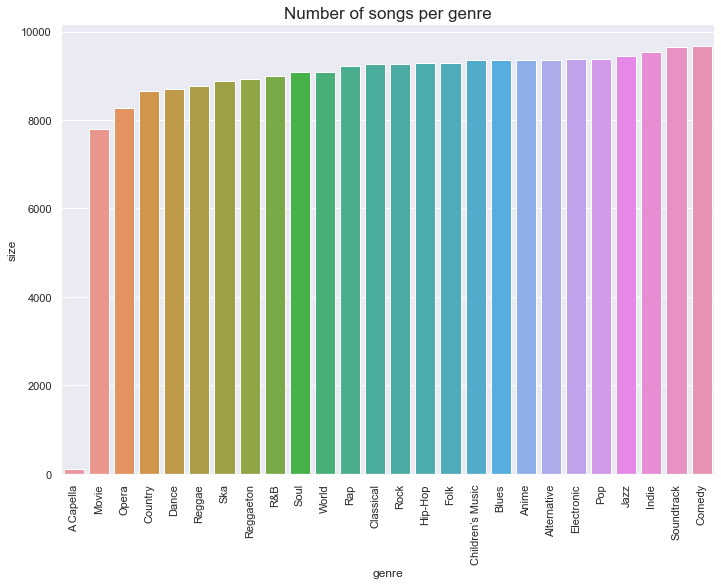

In [12]:
plt.xticks(rotation=90)
sns.barplot(x='genre', y='size', data=df1).set_title("Number of songs per genre", fontsize=17)

In [13]:
df1.head(3)

,genre,size
0,A Capella,119
14,Movie,7806
15,Opera,8280


Text(0.5, 1.0, 'Number of songs per key')

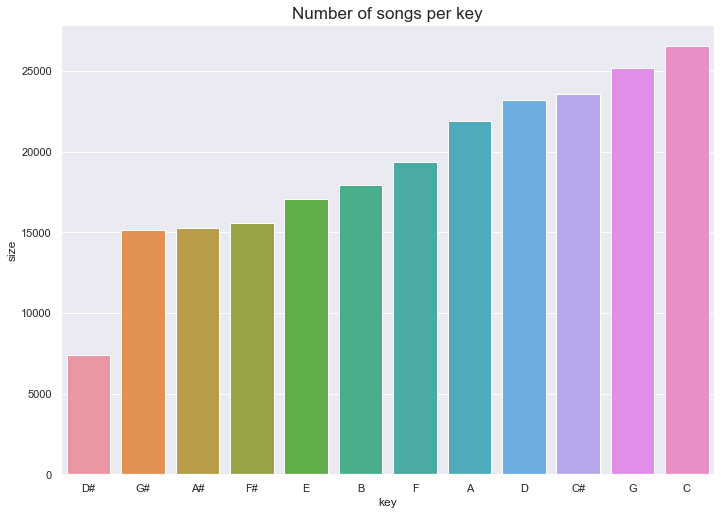

In [14]:
sns.barplot(x='key', y='size', data=df2).set_title("Number of songs per key", fontsize=17)

Text(0.5, 1.0, 'Number of songs per mode')

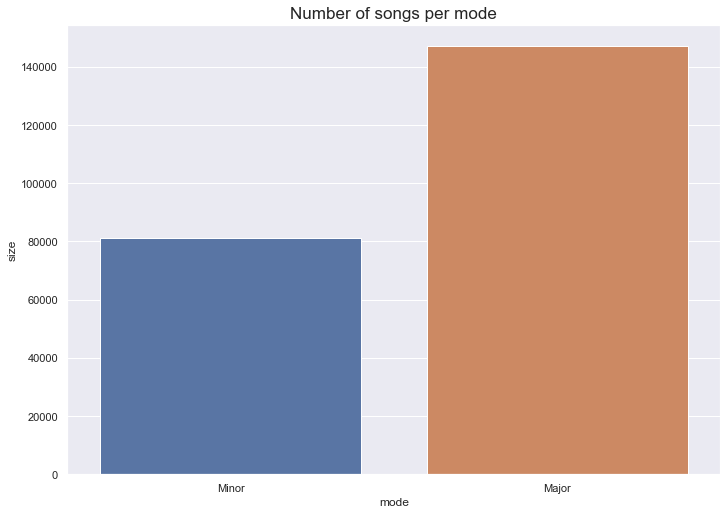

In [15]:
sns.barplot(x='mode', y='size', data=df3).set_title("Number of songs per mode", fontsize=17)

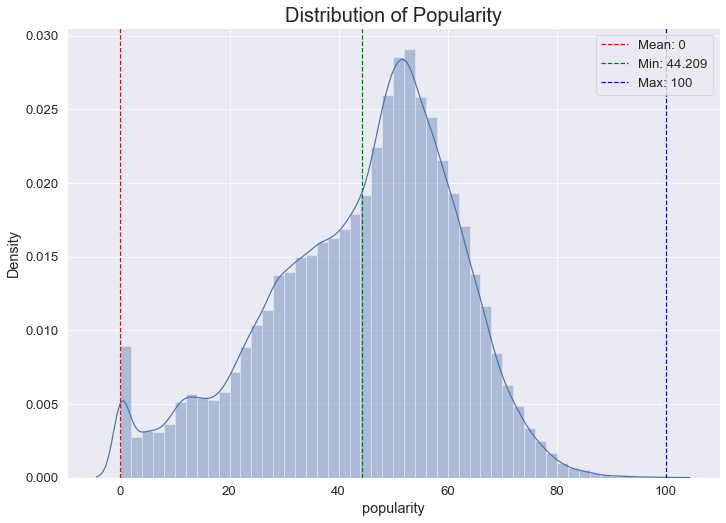

In [16]:
# Distribution of popularity score
sns.set_context("paper", font_scale=1.5)
sns.distplot(df.popularity).set_title("Distribution of Popularity", fontsize=20)
plt.axvline(df.popularity.min(), 0,1, label="Mean: " + str(df.popularity.min()), color = 'red', linestyle='dashed')
plt.axvline(df.popularity.mean(), 0,1, label="Min: " + str(round(df.popularity.mean(),3)), color = 'green', linestyle='dashed')
plt.axvline(df.popularity.max(), 0,1, label="Max: " + str(df.popularity.max()), color = 'blue', linestyle='dashed')
plt.legend()

In [17]:
df_by_artist = df.groupby('artist_name', as_index=False).size().sort_values(by='size',ascending=True)
df_by_artist.sample(15)

,artist_name,size
2252,Chris Botti,29
7756,Max Reger,1
1850,CLOVES,17
2219,Chimbala,2
5374,James Smith,5
10067,SURAN,9
5923,Jonas Knutsson,1
3734,Everything But The Girl,43
8557,Nikolai Kapustin,2
8246,Mungo Jerry,1


In [18]:
df_by_tempo = df.groupby('tempo', as_index=False).size().sort_values(by='size',ascending=True)
df_by_tempo.sample(5)

,tempo,size
66987,173.751,1
22174,94.738,1
12478,81.978,7
17117,87.976,5
32635,109.984,20


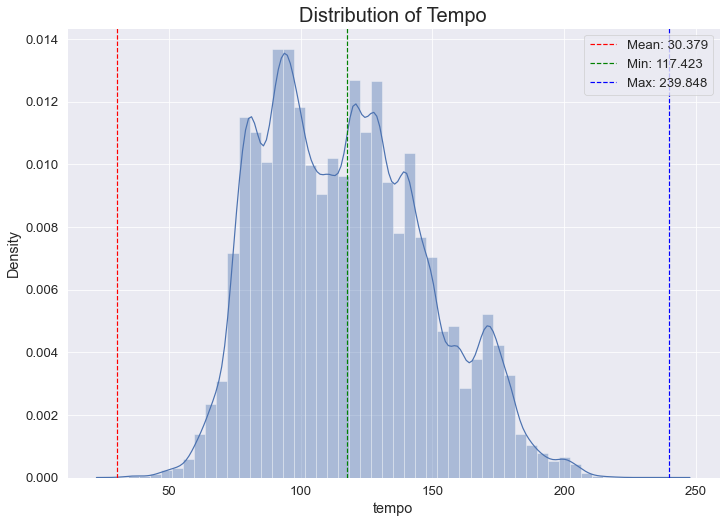

In [19]:
sns.distplot(df.tempo).set_title("Distribution of Tempo", fontsize=20)
plt.axvline(df.tempo.min(), 0,1, label="Mean: " + str(df.tempo.min()), color = 'red', linestyle='dashed')
plt.axvline(df.tempo.mean(), 0,1, label="Min: " + str(round(df.tempo.mean(),3)), color = 'green', linestyle='dashed')
plt.axvline(df.tempo.max(), 0,1, label="Max: " + str(df.tempo.max()), color = 'blue', linestyle='dashed')
plt.legend()

In [20]:
df_valence = df.groupby('valence', as_index=False).size().sort_values(by='size',ascending=True)
df_valence.sample(5)

,valence,size
982,0.2890,285
1575,0.8820,159
796,0.1030,231
317,0.0524,22
854,0.1610,317


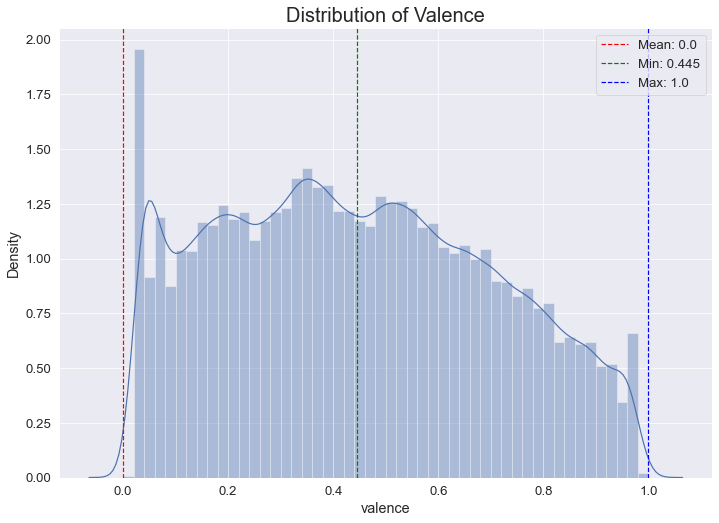

In [21]:
sns.distplot(df.valence).set_title("Distribution of Valence", fontsize=20)
plt.axvline(df.valence.min(), 0,1, label="Mean: " + str(df.valence.min()), color = 'red', linestyle='dashed')
plt.axvline(df.valence.mean(), 0,1, label="Min: " + str(round(df.valence.mean(),3)), color = 'green', linestyle='dashed')
plt.axvline(df.valence.max(), 0,1, label="Max: " + str(df.valence.max()), color = 'blue', linestyle='dashed')
plt.legend()

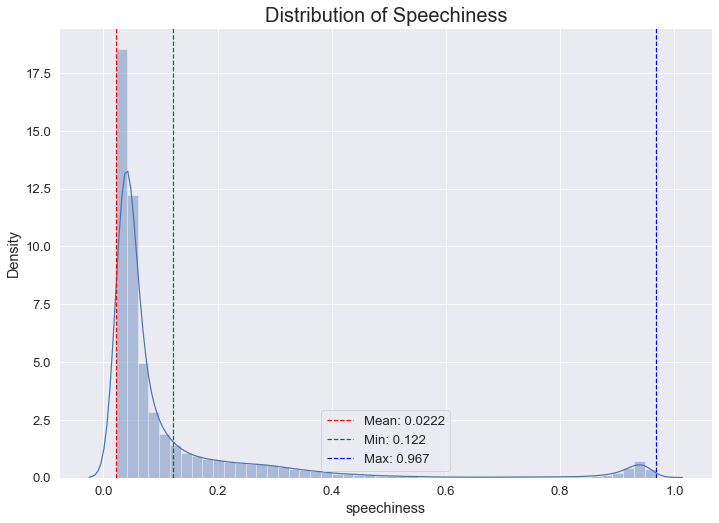

In [22]:
sns.distplot(df.speechiness).set_title("Distribution of Speechiness", fontsize=20)
plt.axvline(df.speechiness.min(), 0,1, label="Mean: " + str(df.speechiness.min()), color = 'red', linestyle='dashed')
plt.axvline(df.speechiness.mean(), 0,1, label="Min: " + str(round(df.speechiness.mean(),3)), color = 'green', linestyle='dashed')
plt.axvline(df.speechiness.max(), 0,1, label="Max: " + str(df.speechiness.max()), color = 'blue', linestyle='dashed')
plt.legend()

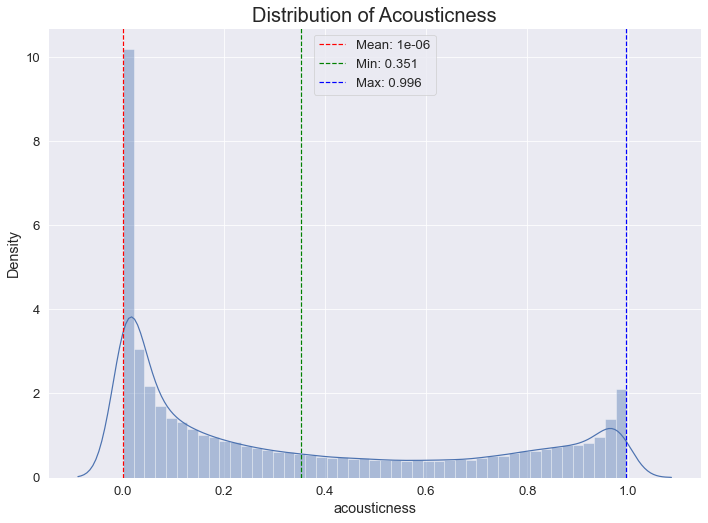

In [23]:
sns.distplot(df.acousticness).set_title("Distribution of Acousticness", fontsize=20)
plt.axvline(df.acousticness.min(), 0,1, label="Mean: " + str(df.acousticness.min()), color = 'red', linestyle='dashed')
plt.axvline(df.acousticness.mean(), 0,1, label="Min: " + str(round(df.acousticness.mean(),3)), color = 'green', linestyle='dashed')
plt.axvline(df.acousticness.max(), 0,1, label="Max: " + str(df.acousticness.max()), color = 'blue', linestyle='dashed')
plt.legend()

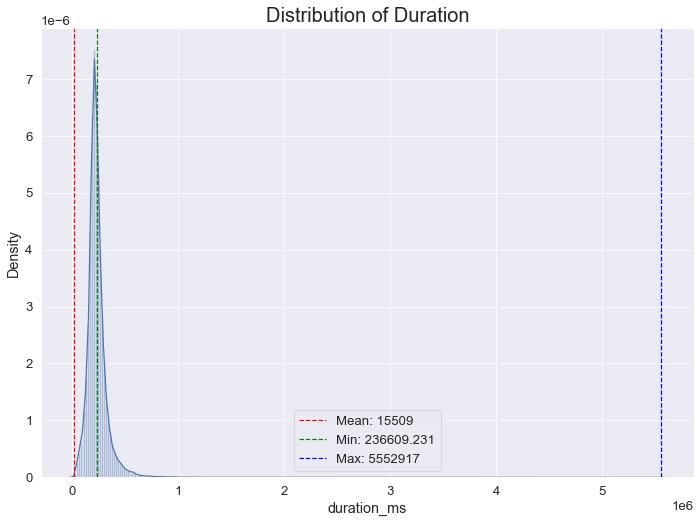

In [108]:
sns.distplot(df.duration_ms,bins=300).set_title("Distribution of Duration", fontsize=20)
plt.axvline(df.duration_ms.min(), 0,1, label="Mean: " + str(df.duration_ms.min()), color = 'red', linestyle='dashed')
plt.axvline(df.duration_ms.mean(), 0,1, label="Min: " + str(round(df.duration_ms.mean(),3)), color = 'green', linestyle='dashed')
plt.axvline(df.duration_ms.max(), 0,1, label="Max: " + str(df.duration_ms.max()), color = 'blue', linestyle='dashed')
plt.legend()

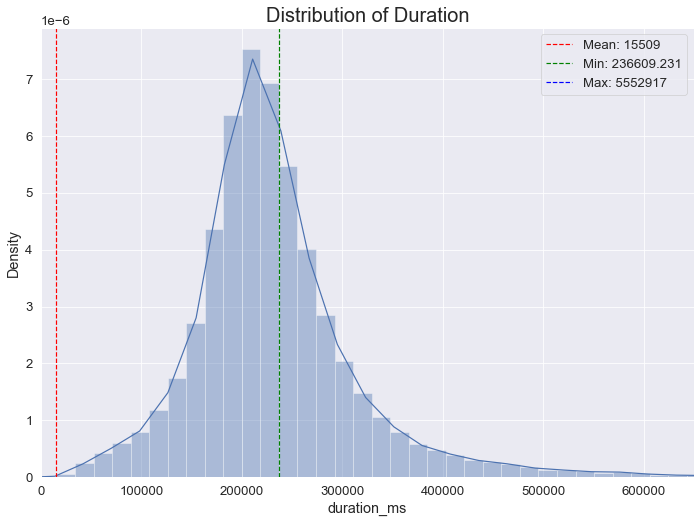

In [111]:
g = sns.distplot(df.duration_ms,bins=300)
g.set_xlim(0,650000)
g.set_title("Distribution of Duration", fontsize=20)
plt.axvline(df.duration_ms.min(), 0,1, label="Mean: " + str(df.duration_ms.min()), color = 'red', linestyle='dashed')
plt.axvline(df.duration_ms.mean(), 0,1, label="Min: " + str(round(df.duration_ms.mean(),3)), color = 'green', linestyle='dashed')
plt.axvline(df.duration_ms.max(), 0,1, label="Max: " + str(df.duration_ms.max()), color = 'blue', linestyle='dashed')
plt.legend()

## Regression

In [40]:
X1 = df[['acousticness', 'danceability', 
            'duration_ms', 'energy', 'instrumentalness', 
            'liveness', 'loudness', 'speechiness', 'tempo', 'valence']]
Y1 = df[['popularity']]
X1 = sm.add_constant(X1)
model1 = sm.OLS(Y1, X1).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     8912.
Date:                Fri, 19 Nov 2021   Prob (F-statistic):               0.00
Time:                        18:17:44   Log-Likelihood:            -9.3623e+05
No. Observations:              228159   AIC:                         1.872e+06
Df Residuals:                  228148   BIC:                         1.873e+06
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               59.4897      0.323  

In [43]:
lr_stats = sm.OLS(Y1, X1).fit()

# print the coefficients
lr_stats.params
lr_stats.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             popularity   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     8912.
Date:                Fri, 19 Nov 2021   Prob (F-statistic):               0.00
Time:                        18:17:48   Log-Likelihood:            -9.3623e+05
No. Observations:              228159   AIC:                         1.872e+06
Df Residuals:                  228148   BIC:                         1.873e+06
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               59.4897      0.323    184.427      0.000      58.858      60.122
acousticness       -11.4568      0.146    -78.281      0.000     -11.744     -11.170
danceability        16.3116      0.227     71.908      0.000      15.867      16.756
duration_ms      -1.914e-06   2.66e-07     -7.188      0.000   -2.44e-06   -1.39e-06
energy              -7.8803      0.261    -30.146      0.000      -8.393      -7.368
instrumentalness    -3.4064      0.129    -26.486      0.000      -3.659      -3.154
liveness           -10.1805      0.189    -53.925      0.000     -10.551      -9.810
loudness             0.8555      0.011     80.015      0.000       0.835       0.876
speechiness         -9.7222      0.215    -45.310      0.000     -10.143      -9.302
tempo                0.0052      0.001      4.975      0.000       0.003       0.007
valence             -9.0617      0.156    -58.007      0.000      -9.368      -8.756
==============================================================================
Omnibus:                     6683.747   Durbin-Watson:                   0.518
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7316.033
Skew:                          -0.423   Prob(JB):                         0.00
Kurtosis:                       3.231   Cond. No.                     3.67e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.67e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
X2 = df[['acousticness', 'danceability']]#, 
            # 'energy', 'instrumentalness', 
            # 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']]
Y2 = df[['popularity']]
X2 = sm.add_constant(X2)
model2 = sm.OLS(Y2, X2).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.199
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                 2.837e+04
Date:                Fri, 19 Nov 2021   Prob (F-statistic):               0.00
Time:                        18:01:45   Log-Likelihood:            -9.4851e+05
No. Observations:              228159   AIC:                         1.897e+06
Df Residuals:                  228156   BIC:                         1.897e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           42.3187      0.127    332.731   

In [45]:
X3 = df[['energy', 'instrumentalness']]
Y3 = df[['popularity']]
X3 = sm.add_constant(X3)
model3 = sm.OLS(Y3, X3).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.095
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                 1.193e+04
Date:                Fri, 19 Nov 2021   Prob (F-statistic):               0.00
Time:                        18:22:48   Log-Likelihood:            -9.6250e+05
No. Observations:              228159   AIC:                         1.925e+06
Df Residuals:                  228156   BIC:                         1.925e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               36.8350      0.098  

### Heat Maps

In [ ]:
ht_df = df[['popularity','acousticness', 'danceability', 
            'duration_ms','energy', 'instrumentalness', 
            'liveness', 'loudness', 'speechiness', 'tempo', 'valence']]

<AxesSubplot:>

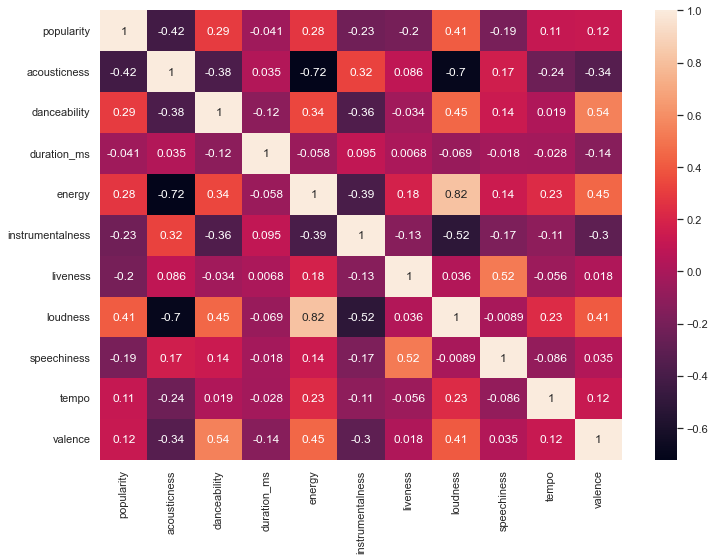

In [ ]:
sns.heatmap(ht_df.corr(), annot=True)

### Label Encoder

In [ ]:
lbc = LabelEncoder()

In [ ]:
for col in categorical_columns:
    df[col] = lbc.fit_transform(df[col])
    print(lbc.classes_)

['A Capella' 'Alternative' 'Anime' 'Blues' 'Children’s Music' 'Classical'
 'Comedy' 'Country' 'Dance' 'Electronic' 'Folk' 'Hip-Hop' 'Indie' 'Jazz'
 'Movie' 'Opera' 'Pop' 'R&B' 'Rap' 'Reggae' 'Reggaeton' 'Rock' 'Ska'
 'Soul' 'Soundtrack' 'World']
['!!!' '"Weird Al" Yankovic' '$NOT' ... '알레프 ALEPH' '어노인팅 Anointing' '정진우']
['" La Traviata " : Amami Alfredo (Act II) - Digitally Remastered'
 '"42" - From SR3MM' '"45"' ... '행복했던 날들이었다 days gone by' '휘파람' '희재']
['A' 'A#' 'B' 'C' 'C#' 'D' 'D#' 'E' 'F' 'F#' 'G' 'G#']
['Major' 'Minor']


In [ ]:
df.head()

,genre,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
0,15,4398,101407,21.0,0.986,0.313,490867.0,0.23100,0.000431,4,0.0964,-14.287,0,0.0547,86.001,0.0886
1,15,4343,66603,18.0,0.972,0.360,176797.0,0.20100,0.028000,6,0.1330,-19.794,0,0.0581,131.798,0.3690
2,15,4343,117043,10.0,0.935,0.168,266184.0,0.47000,0.020400,3,0.3630,-8.415,0,0.0383,75.126,0.0696
3,15,4398,90258,17.0,0.961,0.250,288573.0,0.00605,0.000000,5,0.1200,-33.440,0,0.0480,76.493,0.0380
4,15,4398,28447,19.0,0.985,0.142,629760.0,0.05800,0.146000,5,0.0969,-23.625,0,0.0493,172.935,0.0382


In [ ]:
X3 = df.drop(columns=['popularity'])
Y3 = df[['popularity']]
X3 = sm.add_constant(X3)
model3 = sm.OLS(Y3, X3).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.306
Model:                            OLS   Adj. R-squared:                  0.306
Method:                 Least Squares   F-statistic:                     6701.
Date:                Fri, 19 Nov 2021   Prob (F-statistic):               0.00
Time:                        19:02:21   Log-Likelihood:            -9.3220e+05
No. Observations:              228159   AIC:                         1.864e+06
Df Residuals:                  228143   BIC:                         1.865e+06
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               63.7902      0.337  

In [ ]:
X4 = df.drop(columns=['popularity', 'track_name'])
Y4 = df[['popularity']]
X4 = sm.add_constant(X4)
model4 = sm.OLS(Y4, X4).fit()
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.306
Model:                            OLS   Adj. R-squared:                  0.306
Method:                 Least Squares   F-statistic:                     7180.
Date:                Fri, 19 Nov 2021   Prob (F-statistic):               0.00
Time:                        19:03:46   Log-Likelihood:            -9.3220e+05
No. Observations:              228159   AIC:                         1.864e+06
Df Residuals:                  228144   BIC:                         1.865e+06
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               63.7918      0.332  

In [ ]:
X4 = df.drop(columns=['popularity', 'track_name', 'duration_ms', 'tempo'])
Y4 = df[['popularity']]
X4 = sm.add_constant(X4)
model4 = sm.OLS(Y4, X4).fit()
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.305
Model:                            OLS   Adj. R-squared:                  0.305
Method:                 Least Squares   F-statistic:                     8362.
Date:                Fri, 19 Nov 2021   Prob (F-statistic):               0.00
Time:                        19:11:15   Log-Likelihood:            -9.3226e+05
No. Observations:              228159   AIC:                         1.865e+06
Df Residuals:                  228146   BIC:                         1.865e+06
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               63.9057      0.292  

In [ ]:
sls = df.drop(columns=['track_name', 'duration_ms', 'tempo'])

<AxesSubplot:>

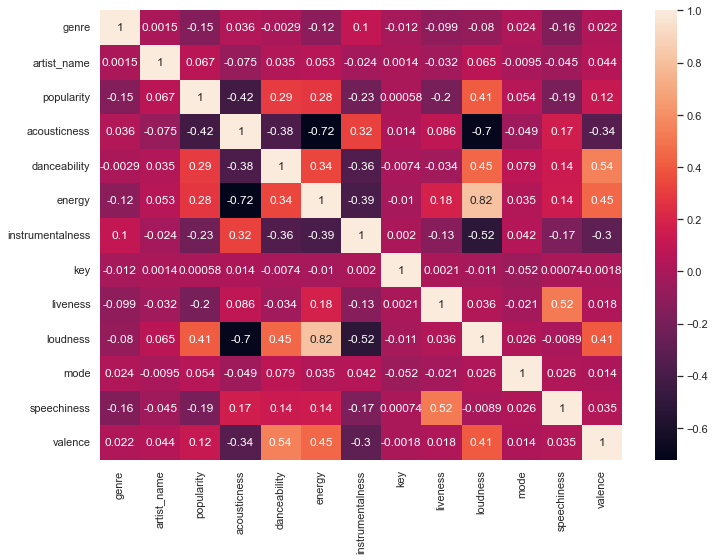

In [ ]:
sns.heatmap(sls.corr(), annot=True)